## Random Forest GridSerachCv

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error,mean_squared_log_error , r2_score

In [4]:
df = pd.read_csv('cleanned_500_final.csv')

In [5]:
df_final = df.drop(['pickup_datetime', 'dropoff_datetime','trip_distance','fare_amount','date_of_year2','year','mo','da','prcp','my_date','week','temp','pickup_geohash','dropoff_geohash','gh','travel_time_shift','travel_time_shift_1','travel_dist_shift','travel_dist_shift_1','fare_amount_shift','fare_amount_shift','fare_amount_shift_1'],axis=1)

In [6]:
X = df_final.drop(['travel_time'],axis =1)
y = df_final['travel_time']

In [7]:
X.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'visib', 'wdsp', 'fog', 'rain_drizzle',
       'snow_ice_pellets', 'Hour', 'distance_in_km', 'week_index',
       'rain_Light', 'rain_Moderate', 'rain_No', 'rush_hour_ind',
       'avg_travel_time', 'avg_hr_travel_time', 'avg_trip_dist',
       'avg_hr_trip_dist', 'avg_fare_amount', 'avg_hr_fare_amount'],
      dtype='object')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [22]:
def get_grid_cv(X_train,y_train,model,param_grid,fold,core):
    grid_search = GridSearchCV(model, param_grid, cv=fold,
    scoring='neg_mean_squared_error',n_jobs = core,verbose =2) 
    grid_search.fit(X_train,y_train)
    return grid_search

#### Tuning max_features

In [11]:
grid_max_features= get_grid_cv(X_train,y_train,RandomForestRegressor(),
                               param_grid = {'max_features':['sqrt','log2']},fold=5,core =2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  4.4min finished
C:\Users\xiaxi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
joblib.dump(grid_max_features, 'Grid_cv_max_features_result')

['Grid_cv_max_features_result']

In [13]:
grid_max_features.best_params_

{'max_features': 'sqrt'}

In [14]:
c = grid_max_features.cv_results_
for mean_score, params in zip(c["mean_test_score"], c["params"]): 
    print(np.sqrt(-mean_score), params)

274.180811661454 {'max_features': 'sqrt'}
274.26146478836404 {'max_features': 'log2'}


#### Tuning n_estimators

In [13]:
grid_n_estimators = get_grid_cv(X_train,y_train,RandomForestRegressor(max_features='sqrt'),param_grid = {'n_estimators':[10,50,100,150]},fold=5,core=1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=  49.2s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.5s remaining:    0.0s


[CV] .................................. n_estimators=10, total=  48.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=  46.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=  44.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=  45.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total= 3.6min
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total= 3.5min
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total= 3.5min
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 137.0min finished


In [14]:
joblib.dump(grid_n_estimators, 'Grid_cv_n_estimators_result')

['Grid_cv_n_estimators_result']

In [15]:
grid_n_estimators.best_params_

{'n_estimators': 150}

In [16]:
c = grid_n_estimators.cv_results_
for mean_score, params in zip(c["mean_test_score"], c["params"]): 
    print(np.sqrt(-mean_score), params)

274.32309299058255 {'n_estimators': 10}
261.976664251011 {'n_estimators': 50}
260.3871323079512 {'n_estimators': 100}
259.94605593654836 {'n_estimators': 150}



#### Tuning max_depth


In [25]:
grid_max_depth = get_grid_cv(X_train,y_train,RandomForestRegressor(max_features='sqrt',n_estimators=150),param_grid = {'max_depth':[10,15,20,25,30,35,40,45,50]},fold=5,core=1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=10 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................................... max_depth=10, total= 4.7min
[CV] max_depth=10 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.0min remaining:    0.0s


[CV] ..................................... max_depth=10, total= 4.7min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total= 4.7min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total= 5.0min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total= 4.9min
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total= 6.8min
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total= 6.7min
[CV] max_depth=15 ....................................................
[CV] ..................................... max_depth=15, total= 6.7min
[CV] max_depth=15 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 491.2min finished


In [27]:
grid_max_depth.best_params_

{'max_depth': 40}

In [36]:
joblib.dump(grid_max_depth, 'Grid_cv_max_depth_result')

['Grid_cv_max_depth_result']

In [28]:
c = grid_max_depth.cv_results_
for mean_score, params in zip(c["mean_test_score"], c["params"]): 
    print(np.sqrt(-mean_score), params)

279.88643516041896 {'max_depth': 10}
269.1569721074578 {'max_depth': 15}
263.2498841060312 {'max_depth': 20}
260.83906220499335 {'max_depth': 25}
260.05416564457767 {'max_depth': 30}
259.97025012168666 {'max_depth': 35}
259.9262319019994 {'max_depth': 40}
259.93478510557196 {'max_depth': 45}
259.9376289603212 {'max_depth': 50}


In [53]:
depth = [10,15,20,25,30,35,40,45,50]
RMSE_test =[np.sqrt(-x) for x in grid_max_depth.cv_results_['mean_test_score']]

<function matplotlib.pyplot.show(*args, **kw)>

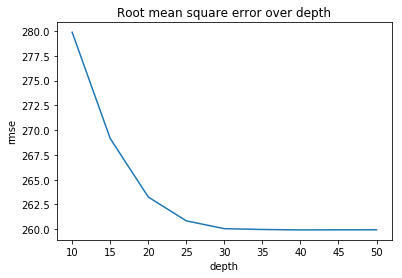

In [57]:
plt.plot(depth,RMSE_test)
plt.title('Root mean square error over depth')
plt.xlabel('depth')
plt.ylabel('rmse')
plt.show

### So parameters are : 'max_features': 'sqrt' , 'n_estimators': 150 , 'max_depth' : 40